# Laboratorio 7
 - Joaquín Puente
 - José Mérida

### Instalación AutoGluon (Google Colab)

In [31]:
!pip install AutoGluon

## 1. Carga del Conjunto de Datos

Primero, vamos a importar las librerías necesarias para el laboratorio

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd
# Configuración para gráficos
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

Luego, podedemos crear un DataFrame para cargar los datos de diabetes.csv

In [33]:
# Importar el dataset
df = pd.read_csv('dataset/diabetes.csv')

print("\nTipos de datos (dtypes):")

print(df.dtypes)

print(f"Dimensiones del dataset: {df.shape}")

df.head(10)


Tipos de datos (dtypes):
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
Dimensiones del dataset: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


Como podemos observar basado en la celda anterior, al igual que la descripción de las columnas del dataset; tenemos 768 observaciones con las siguientes 9 variables.

**Pregnancies**: Entero (int64). Número de veces que la persona ha estado embarazada.

**Glucose**: Entero (int64). Concentración de glucosa medida (mg/dL).

**BloodPressure**: Entero (int64). Presión diastólica (mm Hg).

**SkinThickness**: Entero (int64). Grosor del pliegue del tríceps (mm).

**Insulin**: Entero (int64). Insulina sérica a las 2 h (µU/mL).

**BMI**: Flotante (float64). Índice de masa corporal (kg/m²).

**DiabetesPedigreeFunction**: Flotante (float64). Puntaje basado en antecedentes familiares.

**Age**: Entero (int64). Edad en años.

**Outcome**: Entero binario (int64, 0/1). 1 = diabetes, 0 = no diabetes.

## 2. EDA

### Estadísticas Descriptivas
Empezando por las estadísticas descriptivas, podemos utilizar la función describe.

In [34]:
# Información general del dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Varias variables van cargadas hacia la derecha: Pregnancies, Glucose y Age; Insulin se  tiene una cola bastante grande (max 846 vs 75-percentil 127.5) y outliers claros. Hay muchos ceros en Glucose, BloodPressure, SkinThickness, Insulin y BMI, lo que indica valores mal codificados. Adicionalmente, en SkinTichkness e Insulin el 25-percentil se encuentra en 0 lo que indica que estos valores están afectando las estadísticas de manera significativa. BMI se ve bastante centrado y con dispersión moderada. En resumen, hay sesgo, outliers y ceros no fisiológicos que conviene tratar antes de cualquier modelo. Antes de proceder a realizar cambios, podemos utilizar boxplots para visualizar las distribuciones y tomar decisiones más informadas.

### Valores Nulos
Para verificar valores nulos, simplemente podemos imprimir el count de valores faltantes por cada columna.

In [35]:
# Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())

# Distribución de la variable objetivo
print("\nDistribución de la variable objetivo (Outcome):")
print(df['Outcome'].value_counts())
print(f"\nPorcentaje de casos con diabetes: {df['Outcome'].mean()*100:.2f}%")

Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Distribución de la variable objetivo (Outcome):
Outcome
0    500
1    268
Name: count, dtype: int64

Porcentaje de casos con diabetes: 34.90%


Podemos ver que el dataset no tiene valores faltantes en ninguna de las columnas, sin embargo falta investigar sobre outliers o errores de input. Además, las entradas son principalmente casos de personas sin diabetes. Únicamente el 35% de las personas la tienen, sin embargo, debemos continuar explorando para definir si este desbalanceo puede afectar a nuestros modelos.

### Boxplots

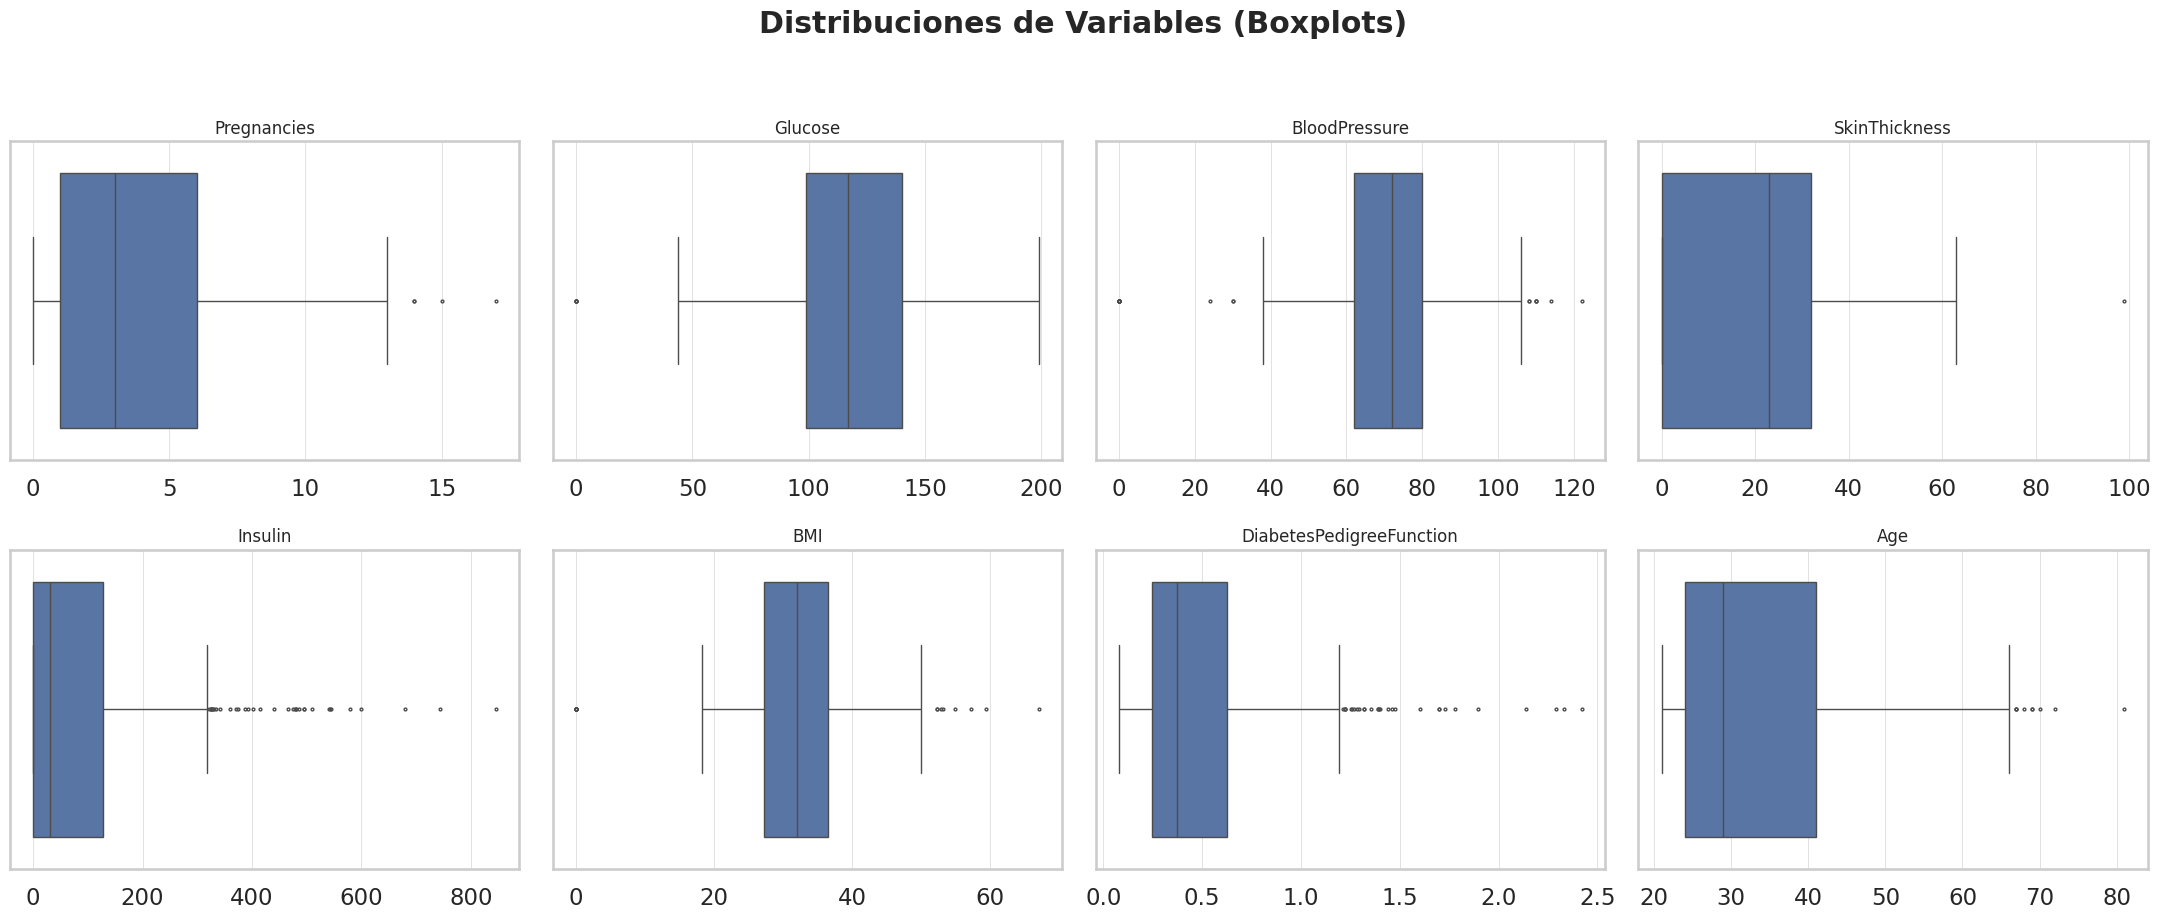

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")

# 8 features
feature_cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
                "Insulin","BMI","DiabetesPedigreeFunction","Age"]

fig, axes = plt.subplots(2, 4, figsize=(22, 9))
fig.suptitle('Distribuciones de Variables (Boxplots)', fontweight='bold', y=1.03)

for ax, col in zip(axes.ravel(), feature_cols):
    sns.boxplot(x=df[col], ax=ax, whis=1.5, fliersize=2)
    ax.set_title(col, fontsize=12)
    ax.set_xlabel(None)
    ax.grid(True, axis='x', linewidth=0.4)

plt.tight_layout()
plt.show()


Estos boxplots respaldan lo mencionado con anterioridad, hay variables dónde no tiene sentido que la medición haya sido 0. Estos en realidad son valores faltantes o errores de input con los que debemos lidear. Además, también podemos observar algunas entradas con valores bastante atípicos, como lo pueden ser SkinTickness o ciertas observaciones de Insulin.

### Valores Faltantes
En este caso, tenemos varias maneras de lidear con los valores faltantes. Sin embargo, todavía debemos realizar un poco más de exploración. Por ejemplo, en la distribución de SkinThickness nos podemos dar cuenta que más del 25% de los valores son 0. Debemos ser bastante cuidadosos e investigar la proporción de valores nulos en cada variable.

In [37]:
# Columnas donde 0 es ilógico
zero_invalid = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# Conteos de ceros por columna
zero_counts = (df[zero_invalid] == 0).sum().sort_values(ascending=False)

# Filas con ≥1 cero en esas columnas
mask_any_zero = (df[zero_invalid] == 0).any(axis=1)

print("Ceros por columna (donde 0 es ilógico):")
print(zero_counts.to_string())
print(f"\nFilas con ≥1 cero en {zero_invalid}: {int(mask_any_zero.sum())} de {len(df)}")


Ceros por columna (donde 0 es ilógico):
Insulin          374
SkinThickness    227
BloodPressure     35
BMI               11
Glucose            5

Filas con ≥1 cero en ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']: 376 de 768


Según el análisis, 376 de 768 filas tienen más de algún valor faltante. En este caso, removerlas sería una pérdida significativa de información. Adicionalmente, al conocer las variables podemos intuir que algunas de ellas están bastante correlacionadas. Debido a esto, decidimos tomar dos approaches diferentes dependiendo de la columna.

### KNN Inputter
Para las columnas de Insulin y SkinThickness decidimos utilizar un KNN Inputter, este lo que hace es apoyarse en KNN para reemplazar los valores faltantes por valores de columnas similares. Consideramos este approach una mejora sobre el tradicional reemplazo por la media, ya que esta variable puede estar correlacionada con otras y utilizar la media puede ser menos adecuado.

In [38]:
# Imputación simple con RobustScaler + KNN
df_knn = df.copy()
impute_cols = ["Insulin", "SkinThickness"]

# ceros -> NaN solo en las columnas imputadas
for c in impute_cols:
    df_knn.loc[df_knn[c] == 0, c] = np.nan

# features SIN Outcome
feat_cols = [c for c in df_knn.columns if c != "Outcome"]

# escalar, imputar, desescalar
scaler = RobustScaler()
X_scaled = scaler.fit_transform(df_knn[feat_cols])
X_imp_scaled = KNNImputer(n_neighbors=7, weights="distance").fit_transform(X_scaled)
X_imp = scaler.inverse_transform(X_imp_scaled)

# actualizar solo las columnas imputadas
X_imp_df = pd.DataFrame(X_imp, columns=feat_cols, index=df_knn.index)
for c in impute_cols:
    df_knn[c] = X_imp_df[c]

# df_knn es el dataframe resultante
df = df_knn

# Verificación rápida (deberían ser 0 ceros en las columnas filtradas)
print("\nCeros restantes en columnas filtradas:")
print((df[impute_cols] == 0).sum().to_string())


Ceros restantes en columnas filtradas:
Insulin          0
SkinThickness    0


### Remover Filas con Valores Faltantes
En el caso de Glucose, BloodPressure y BMI decidimos simplemente remover las filas con valores faltantes ya que representan una porción menos significativa dentro del dataset.

In [39]:
drop_if_zero_cols = ["Glucose", "BloodPressure", "BMI"]

mask_zero_bad = (df[drop_if_zero_cols] == 0).any(axis=1)
n_before = len(df)
n_drop = int(mask_zero_bad.sum())

df_clean = df.loc[~mask_zero_bad].copy()
df = df_clean
n_after = len(df_clean)

print(f"Filas eliminadas por ceros en {drop_if_zero_cols}: {n_drop}")
print(f"Filas finales: {n_after} / {n_before} ({n_after/n_before:.1%})")

# Verificación rápida (deberían ser 0 ceros en las columnas filtradas)
print("\nCeros restantes en columnas filtradas:")
print((df[drop_if_zero_cols] == 0).sum().to_string())

Filas eliminadas por ceros en ['Glucose', 'BloodPressure', 'BMI']: 44
Filas finales: 724 / 768 (94.3%)

Ceros restantes en columnas filtradas:
Glucose          0
BloodPressure    0
BMI              0


Como resultado, tenemos un dataset sin valores faltantes con un tamaño de 724 (el 94.3% de la información original)

### Boxplots Sin Valores Faltantes



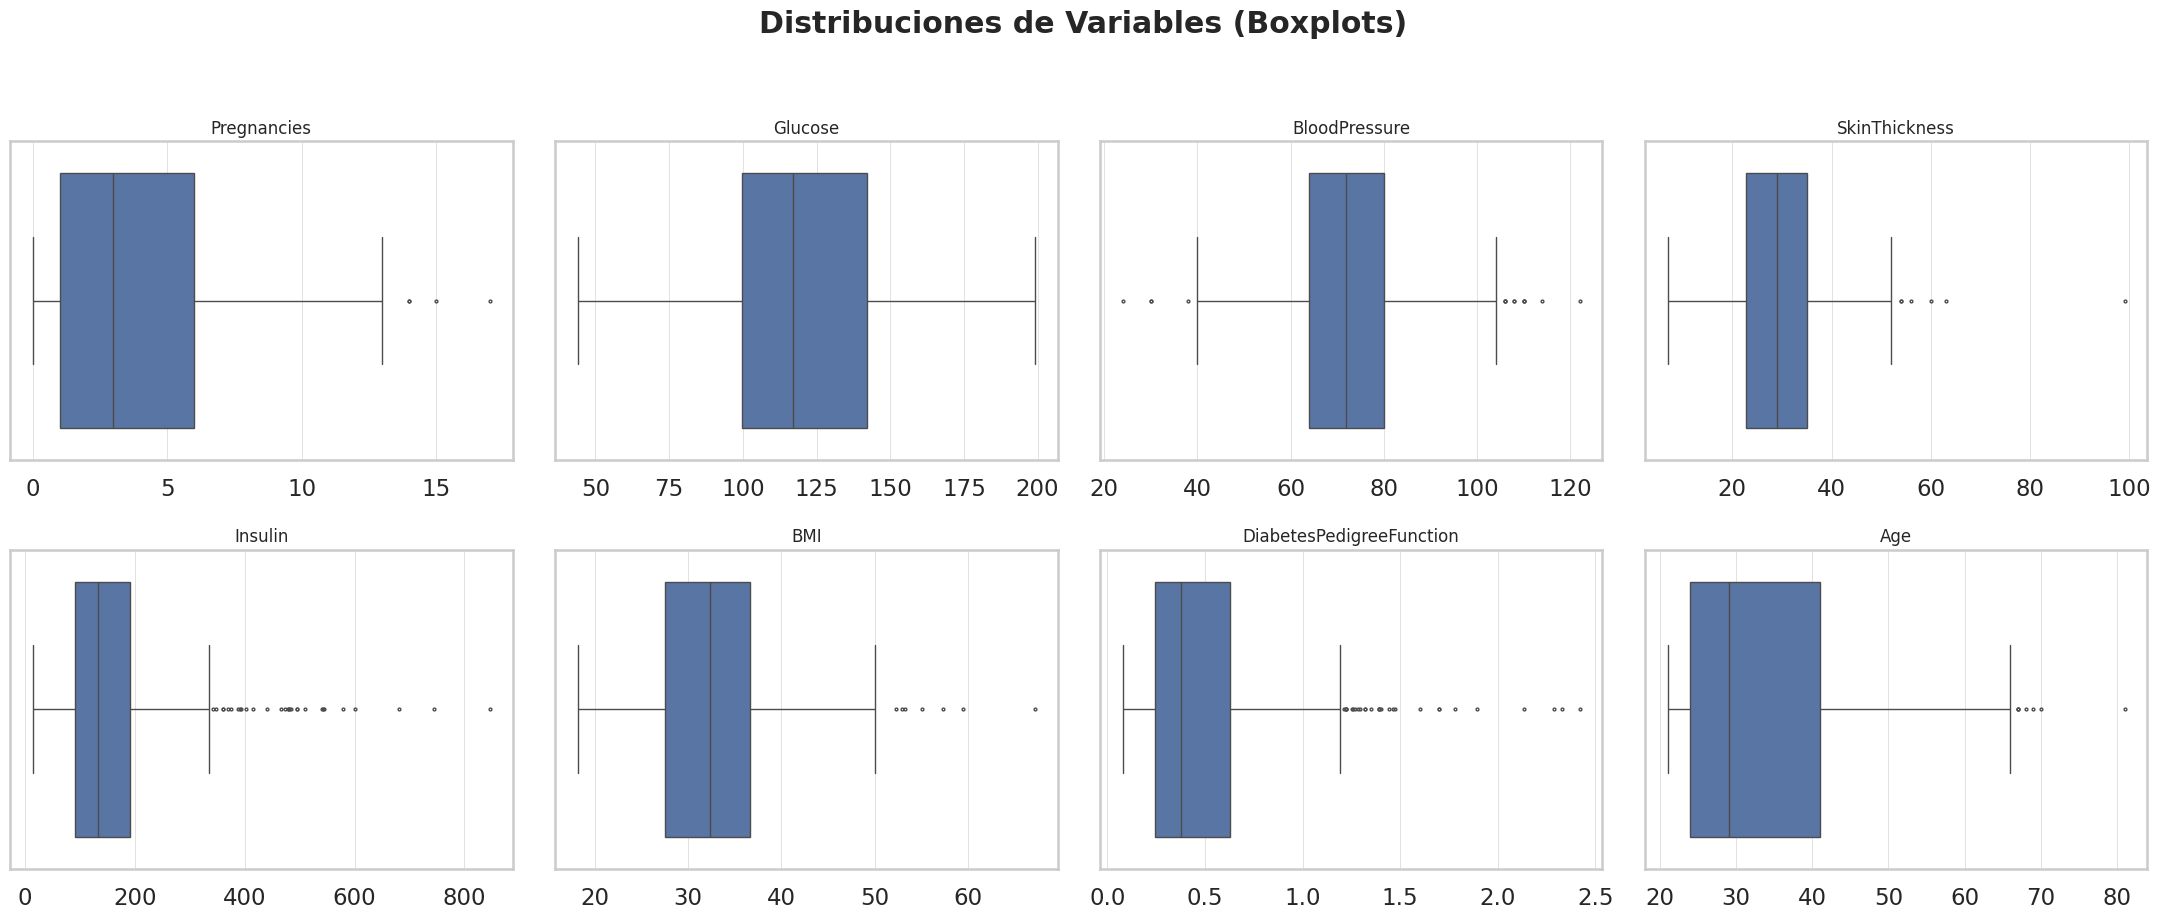

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")

# 8 features
feature_cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
                "Insulin","BMI","DiabetesPedigreeFunction","Age"]

fig, axes = plt.subplots(2, 4, figsize=(22, 9))
fig.suptitle('Distribuciones de Variables (Boxplots)', fontweight='bold', y=1.03)

for ax, col in zip(axes.ravel(), feature_cols):
    sns.boxplot(x=df[col], ax=ax, whis=1.5, fliersize=2)
    ax.set_title(col, fontsize=12)
    ax.set_xlabel(None)
    ax.grid(True, axis='x', linewidth=0.4)

plt.tight_layout()
plt.show()

Luego de realizar la limpiza correspondiente de los datos, podemos identificar más claramente los outliers. En este caso, observamos que existen algunas mediciones muy fuera de lo común en ciertas variables como insulin (800+) o algunas mediciones de BMI más allá de los 55. En este caso, consideramos que lo más adecuado sería contactar algún experto en el tema para identificar valores atípicos o posibles errores de medición en algunas de las variables. Sin embargo, para finalidades del laboratorio podemos utilizar la regla de IQR y tener valores un poco más uniformes.

### Valores Atípicos con IQR
Como fue mencionado en la celda anterior, vamos a remover los valores que se encuentran a más de 1.5 IQRs de la media.

In [41]:
# Columnas numéricas
numeric_columns = [c for c in df.columns if c != "Outcome" and np.issubdtype(df[c].dtype, np.number)]

# Diccionarios para guardar límites y máscaras
bounds = {}
col_outlier_counts = {}
outlier_masks = []

for column in numeric_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    bounds[column] = (lower, upper)

    mask_col = (df[column] < lower) | (df[column] > upper)
    outlier_masks.append(mask_col)

    count_col = int(mask_col.sum())
    col_outlier_counts[column] = count_col
    print(f"{column}: {count_col} outliers ({count_col/len(df)*100:.2f}%) | límites [{lower:.3f}, {upper:.3f}]")

# Máscara global: outlier si lo es en cualquiera de las columnas
mask_any_outlier = np.logical_or.reduce(outlier_masks) if outlier_masks else pd.Series(False, index=df.index)
n_before = len(df)
n_drop = int(mask_any_outlier.sum())
n_after = n_before - n_drop

print("-"*60)
print(f"Filas a eliminar por ser outlier en ≥1 columna: {n_drop} / {n_before} ({n_drop/n_before:.1%})")
print(f"Filas restantes tras eliminación: {n_after} ({n_after/n_before:.1%})")

# Indices que se eliminan (por si quieres auditar)
removed_indices = df.index[mask_any_outlier]

# DataFrame limpio (sin outliers)
df_no_outliers = df.loc[~mask_any_outlier].copy()

# Verificación rápida: recomputa cuántos outliers quedarían (debería bajar a 0 por columna)
print("\nVerificación post-filtrado (esperable ~0 por columna):")
for column in numeric_columns:
    lower, upper = bounds[column]
    remaining = int(((df_no_outliers[column] < lower) | (df_no_outliers[column] > upper)).sum())
    print(f"{column}: {remaining}")

df = df_no_outliers


Pregnancies: 4 outliers (0.55%) | límites [-6.500, 13.500]
Glucose: 0 outliers (0.00%) | límites [36.375, 205.375]
BloodPressure: 14 outliers (1.93%) | límites [40.000, 104.000]
SkinThickness: 6 outliers (0.83%) | límites [4.582, 53.317]
Insulin: 29 outliers (4.01%) | límites [-59.962, 341.249]
BMI: 7 outliers (0.97%) | límites [13.850, 50.250]
DiabetesPedigreeFunction: 28 outliers (3.87%) | límites [-0.329, 1.201]
Age: 7 outliers (0.97%) | límites [-1.500, 66.500]
------------------------------------------------------------
Filas a eliminar por ser outlier en ≥1 columna: 86 / 724 (11.9%)
Filas restantes tras eliminación: 638 (88.1%)

Verificación post-filtrado (esperable ~0 por columna):
Pregnancies: 0
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0


Como resultado, removimos alrededor del 20% de los valores del dataset. En este caso, estamos un poco al "borde" de lo que puede ser considerado apto para remover. Sin embargo, consideramos que las acciones de limpieza están justificadas y podemos proceder a aplicar modelos.

### Distribuciones

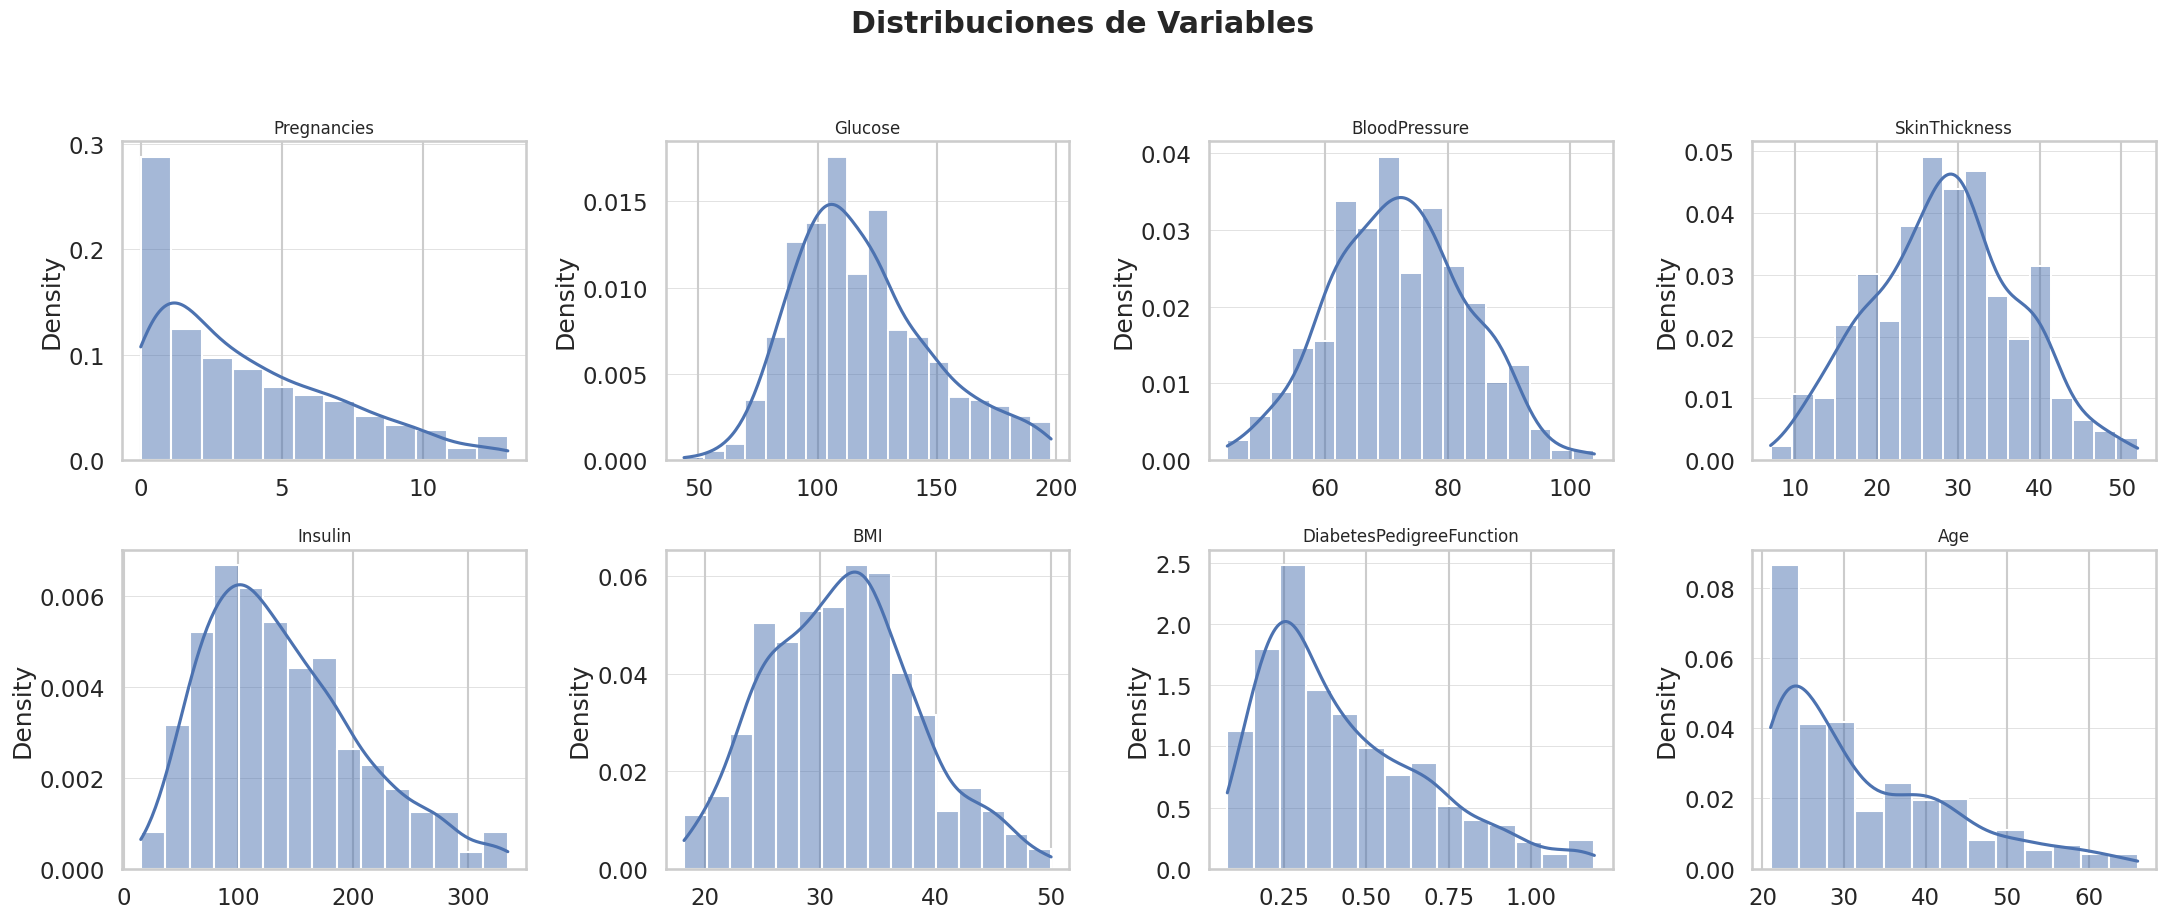

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")

# 8 features
feature_cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
                "Insulin","BMI","DiabetesPedigreeFunction","Age"]

# Distribuciones (hist + KDE) en 2 filas x 4 columnas
fig, axes = plt.subplots(2, 4, figsize=(22, 9))
fig.suptitle('Distribuciones de Variables', fontweight='bold', y=1.03)

for ax, col in zip(axes.ravel(), feature_cols):
    sns.histplot(data=df, x=col, bins="auto", kde=True, stat="density", ax=ax)
    ax.set_title(col, fontsize=12)
    ax.set_xlabel(None)
    ax.grid(True, axis='y', linewidth=0.4)

plt.tight_layout()
plt.show()


Observando las distribuciones, nos podemos dar cuenta que ya no contamos con valores atípicos y los datos empiezan a tener una forma más similar a lo esperado (una distribución cercana a una distribución de campana, obviamente con sesgos y kurtosis variados). En este caso, logramos evitar tener valores inválidos o extremos, potencialmente ayudando a nuestros modelos a clasificar de manera más adecuada.

### Balance de Clases

,count,percent
Outcome,,
0,435,68.18
1,203,31.82


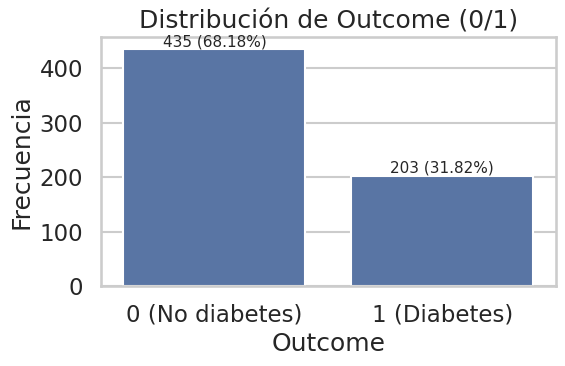

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", context="talk")

counts = df["Outcome"].value_counts().sort_index()
perc = (counts / counts.sum() * 100).round(2)
stats = pd.DataFrame({"count": counts, "percent": perc})
display(stats)

# Gráfico
labels = ["0 (No diabetes)", "1 (Diabetes)"]
plt.figure(figsize=(6,4))
ax = sns.barplot(x=labels, y=counts.values)
ax.set_ylabel("Frecuencia")
ax.set_xlabel("Outcome")
ax.set_title("Distribución de Outcome (0/1)")

# Anotaciones de conteo y porcentaje arriba de cada barra
for i, v in enumerate(counts.values):
    ax.text(i, v, f"{v} ({perc.iloc[i]}%)", ha="center", va="bottom", fontsize=11)

plt.tight_layout()
plt.show()


Al revisar el balance de las clases, nos podemos dar cuenta que el dataset contiene más casos de personas sin diabetes en comparación a personas con diabetes. Las personas con diabetes representan únicamente el 31.37% de la población, esto se debe de mantener en cuenta al trabajar con modelos de predicción e interpretar las métricas. Dónde ciertos puntajes de accuracy pueden verse afectados al sobre-predecir la clase dominante y obtener mejores puntajes a pesar de no tener un mejor poder predictivo.

### Matriz de Correlación y Mapa de Calor

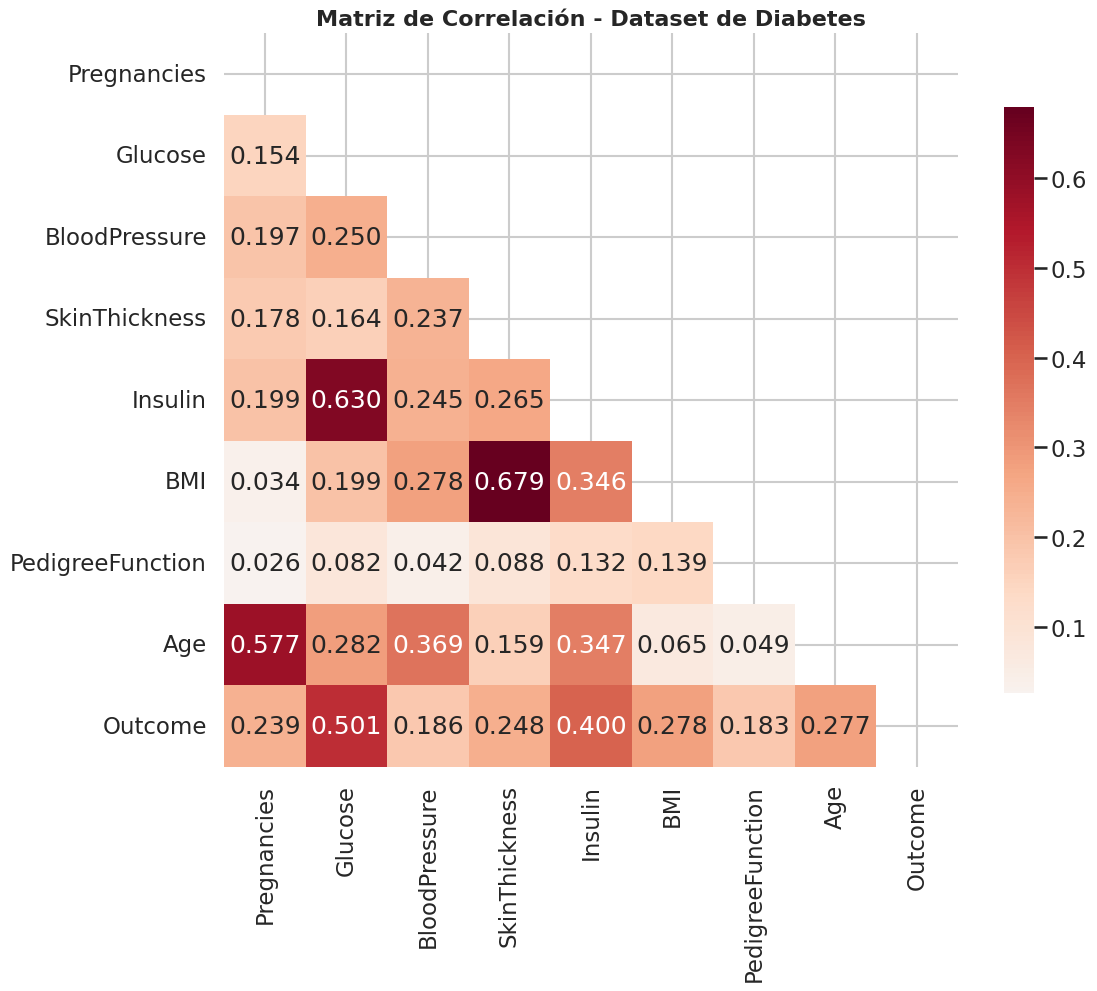

In [44]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Compute correlation
correlation_matrix = df.corr(numeric_only=True)

# 2) Rename label for display
rename_map = {"DiabetesPedigreeFunction": "PedigreeFunction"}
corr_ren = correlation_matrix.rename(index=rename_map, columns=rename_map)

# 3) Heatmap
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr_ren, dtype=bool))
sns.heatmap(
    corr_ren, mask=mask, annot=True, cmap='RdBu_r', center=0, square=True,
    fmt='.3f', cbar_kws={"shrink": .8}
)
plt.title('Matriz de Correlación - Dataset de Diabetes', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


Dentro de la matriz de correlación, nos podemos dar cuenta inmediatamente que los niveles de insulina y glucosa parecen ser las variables más correlacionadas al riesgo de diabetes. Adicionalmente, el resto de variables incluidas también parecen tener cierta correlación con la variable objetivo. Entre las demás relaciones, podemos observar que existen otras relaciones fuertes como BMI y SkinThickness o Glucose e Insulin. En este caso, consideramos que sería una buena idea consultar con algún experto sobre las relaciones subyacentes en estas variables para identificar alguna posible transformación de los datos. Dónde por ejemplo, tener BMI y SkinThickness midiendo un mismo factor de riesgo puede que haga parecer que ambas variables son importantes pero simplemente estén correlacionadas entre ellas generándole ruido a nuestros modelos.

### Boxplots por Clase
Adicionalmente, podemos explorar un poco más las relaciones por medio de boxplots separados por clase.

/tmp/ipython-input-3274320971.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3274320971.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3274320971.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3274320971.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/tmp/ipython-input-3274320971.py:17: FutureWarning: 

Passin

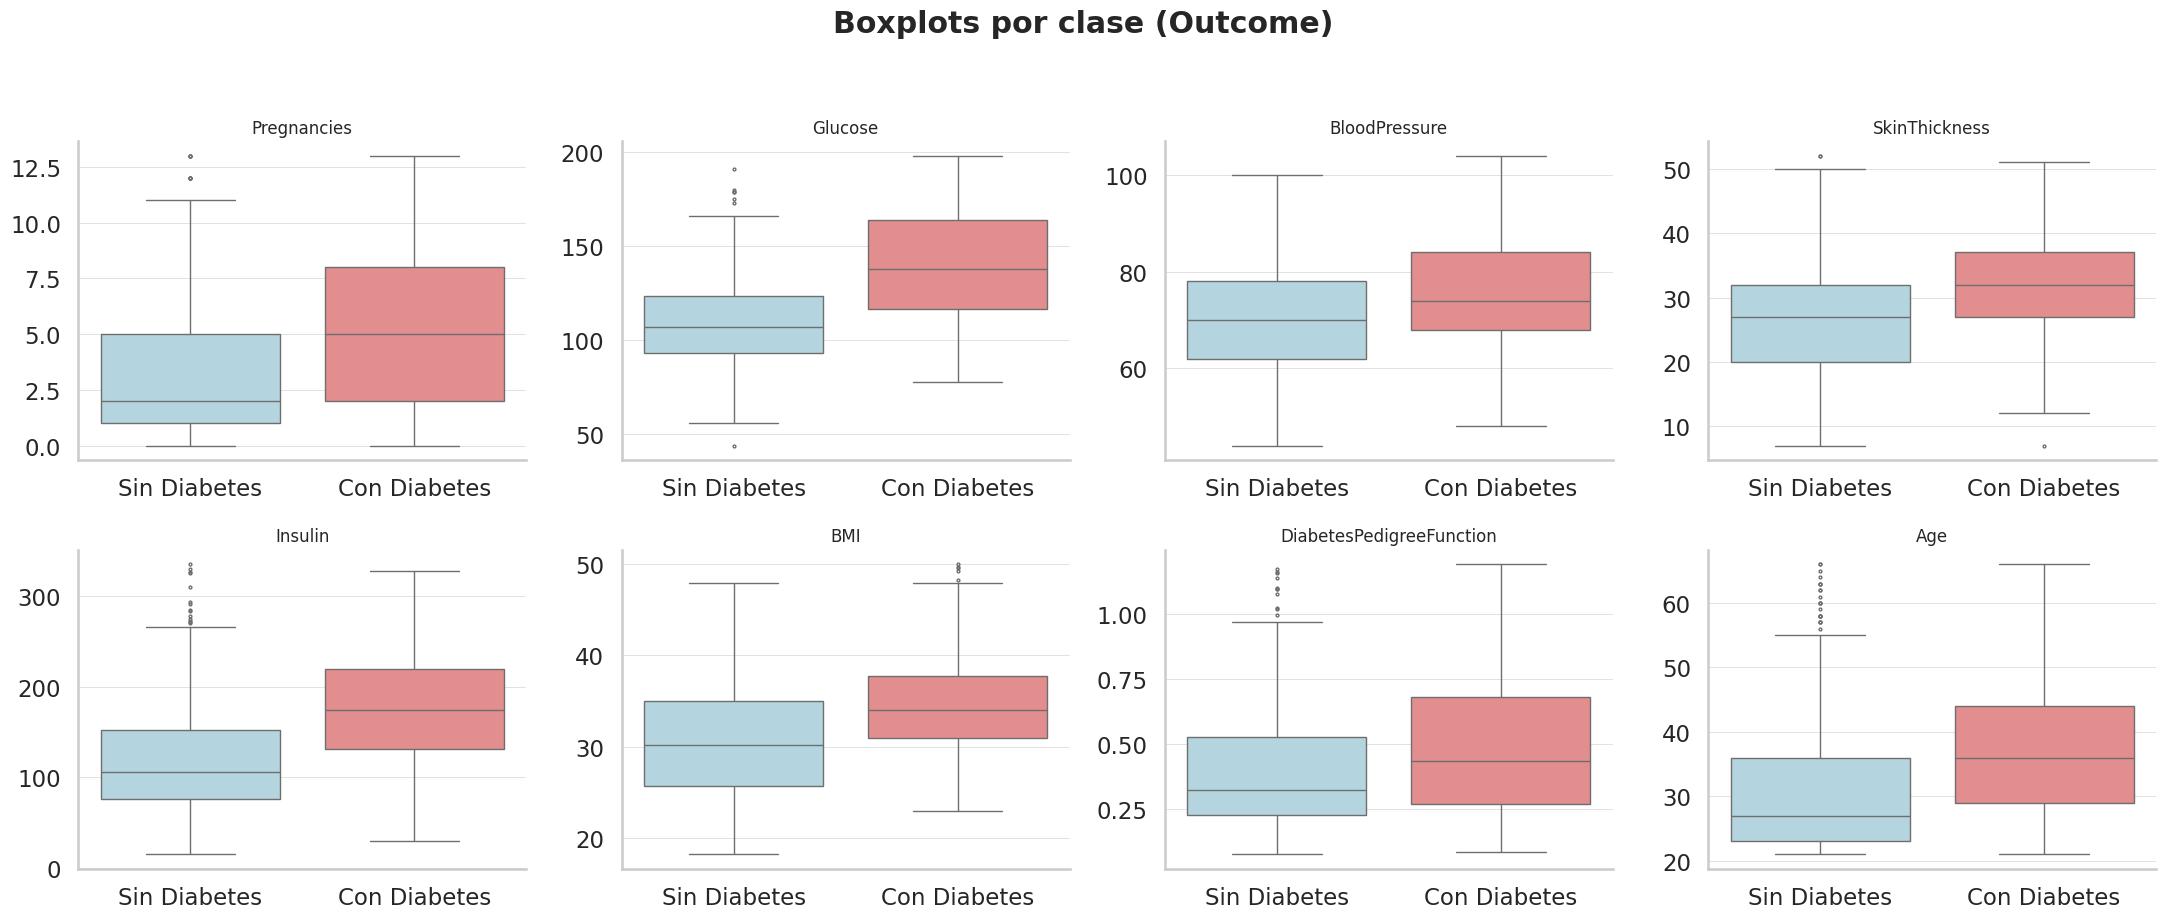

In [45]:
sns.set_theme(style="whitegrid", context="talk")

feature_cols = ["Pregnancies","Glucose","BloodPressure","SkinThickness",
                "Insulin","BMI","DiabetesPedigreeFunction","Age"]

order = ["Sin Diabetes", "Con Diabetes"]
outcome_label = pd.Categorical(df["Outcome"].map({0: order[0], 1: order[1]}),
                               categories=order, ordered=True)
palette = {"Sin Diabetes": "lightblue", "Con Diabetes": "lightcoral"}

fig, axes = plt.subplots(2, 4, figsize=(22, 9))
fig.suptitle("Boxplots por clase (Outcome)", fontweight="bold", y=1.03)

for ax, col in zip(axes.ravel(), feature_cols):
    tmp = df[[col]].copy()
    tmp["OutcomeLabel"] = outcome_label
    sns.boxplot(
        data=tmp,
        x="OutcomeLabel", y=col,
        order=order,
        palette=palette,
        whis=1.5, fliersize=2,
        ax=ax
    )
    ax.set_title(col, fontsize=12)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.grid(True, axis="y", linewidth=0.4)
    sns.despine(ax=ax, top=True, right=True)

plt.tight_layout()
plt.show()


Observando los boxplots, podemos darnos cuenta que la mayoría de variables si presenta diferencias entre ambas clases. Entre las variables más interesantes, podemos darnos cuenta que las medidas de insulina para personas sin diabetes suelen ser mucho menores a las personas con diabetes. Sin embargo, también nos damos cuenta que definitivamente no es un indicador correcto al 100%. En este caso, podemos ver que existe una clara diferencia entre los valores centrales. Sin embargo, es normal ver personas con diabetes e insulina baja y viceversa.

## 3. Entrenamiento con AutoGluon

### División Entrenamiento y Prueba

In [46]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from autogluon.tabular import TabularPredictor

train_df, test_df = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df["Outcome"]
)

X_train = train_df.drop(columns=["Outcome"])
y_train = train_df["Outcome"]
X_test  = test_df.drop(columns=["Outcome"])
y_test  = test_df["Outcome"]

len(train_df), len(test_df), y_train.mean(), y_test.mean()

(510, 128, np.float64(0.3176470588235294), np.float64(0.3203125))

Basado en el output, podemos ver que los conjuntos fueron separados de manera exitosa. Adicionalmente, se encuentran separados con una proporción similar de casos de pacientes con diabetes vs sin diabetes.

### Modelo Baseline
Para el modelo baseline decidimos utilizar una regresión logística

Baseline (LogReg) accuracy: 0.8047
              precision    recall  f1-score   support

           0     0.8100    0.9310    0.8663        87
           1     0.7857    0.5366    0.6377        41

    accuracy                         0.8047       128
   macro avg     0.7979    0.7338    0.7520       128
weighted avg     0.8022    0.8047    0.7931       128



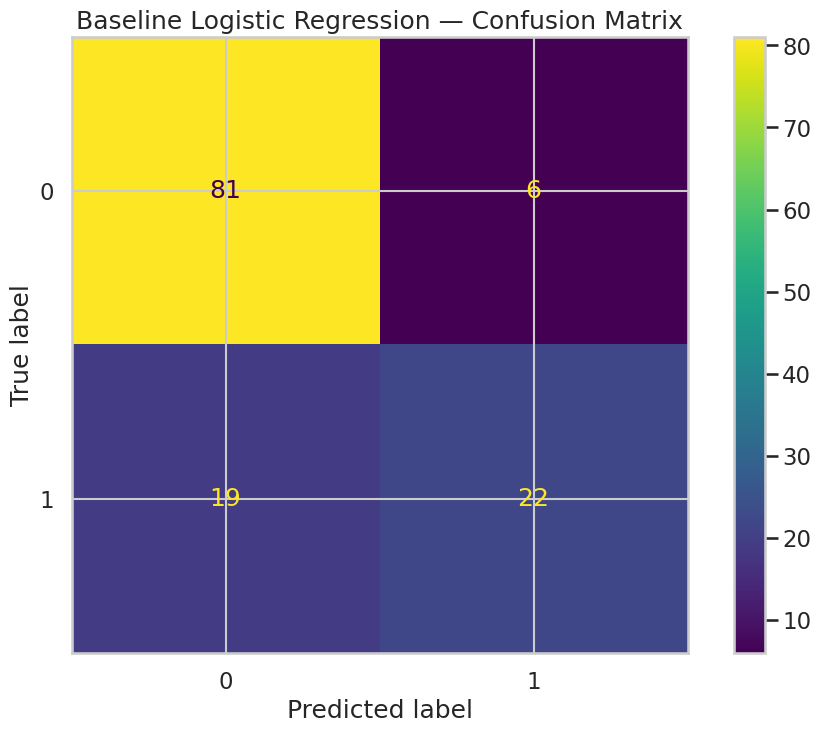

In [47]:
base_clf = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=2000, random_state=42))
])

base_clf.fit(X_train, y_train)
y_pred_base = base_clf.predict(X_test)
acc_base = accuracy_score(y_test, y_pred_base)

print(f"Baseline (LogReg) accuracy: {acc_base:.4f}")
print(classification_report(y_test, y_pred_base, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_base)
plt.title("Baseline Logistic Regression — Confusion Matrix")
plt.show()

Basado en la matriz de confusión y las estadísticas, la regresión logísticas es un modelo bastante formidable en este caso. En general, el accuracy es bastante alto con un 80%. Sin embargo, podemos darnos cuenta que el modelo fue afectado debido al desbalanceo de clases. En este caso, la mayoría de predicciones erróneas fueron predecir la clase dominante (sin diabetes) cuando en realidad eran casos de la clase con menor representación (con diabetes). Esto nos muestra que el accuracy representa realmente lo que está sucediendo con el modelo, dónde el recall de personas con diabetes es bastante bajo.

### AutoGluon
Aquí utilizamos AutoGluon con el preset de "best_quality", métrica de "accuracy" y un tiempo de entrenamiento de 10mins como límite para entrenar múltiples modelos de clasificación.

In [48]:
PRED_PATH = "autogluon_out"
predictor = TabularPredictor(
    label="Outcome",
    eval_metric="accuracy",
    path=PRED_PATH
).fit(
    train_data=train_df,
    presets="best_quality",
    time_limit=600,
    verbosity=2
)

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sat Sep  6 09:54:41 UTC 2025
CPU Count:          2
Memory Avail:       10.37 GB / 12.67 GB (81.8%)
Disk Space Avail:   67.14 GB / 112.64 GB (59.6%)
Presets specified: ['best_quality']
Using hyperparameters preset: hyperparameters='zeroshot'
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_stack_levels` value. Copies of AutoGluon will be fit on subsets of the d

### Mejor Modelo

AutoGluon (CatBoost_r177_BAG_L1) accuracy: 0.8203
              precision    recall  f1-score   support

           0     0.8137    0.9540    0.8783        87
           1     0.8462    0.5366    0.6567        41

    accuracy                         0.8203       128
   macro avg     0.8299    0.7453    0.7675       128
weighted avg     0.8241    0.8203    0.8073       128



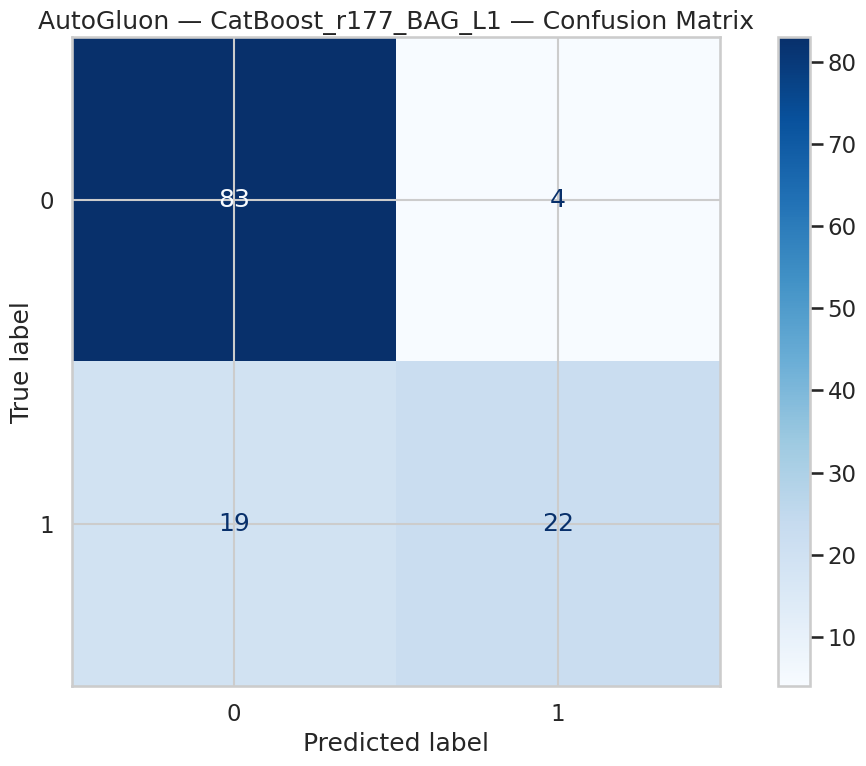

In [49]:
leader = predictor.leaderboard(test_df, silent=True)
best_model_name = leader.sort_values("score_test", ascending=False).iloc[0]["model"]

y_pred_best = predictor.predict(test_df, model=best_model_name)
acc_best = accuracy_score(y_test, y_pred_best)

print(f"AutoGluon ({best_model_name}) accuracy: {acc_best:.4f}")
print(classification_report(y_test, y_pred_best, digits=4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap="Blues")
plt.title(f"AutoGluon — {best_model_name} — Confusion Matrix")
plt.tight_layout()
plt.show()

En este caso, el mejor modelo fue CatBoost_r177_BAG_L1. Podemos ver por la matriz de confusión que su rendimiento realmente fue bastante parecido a la regresión logística baseline. Su mayor diferencia es la identificación más precisa de personas que no tienen diabetes. En los próximos incisos estaremos comparando su rendimiento más a profundidad.

### Importancia de Características

Computing feature importance via permutation shuffling for 8 features using 128 rows with 5 shuffle sets...
	3.03s	= Expected runtime (0.61s per shuffle set)
	0.53s	= Actual runtime (Completed 5 of 5 shuffle sets)


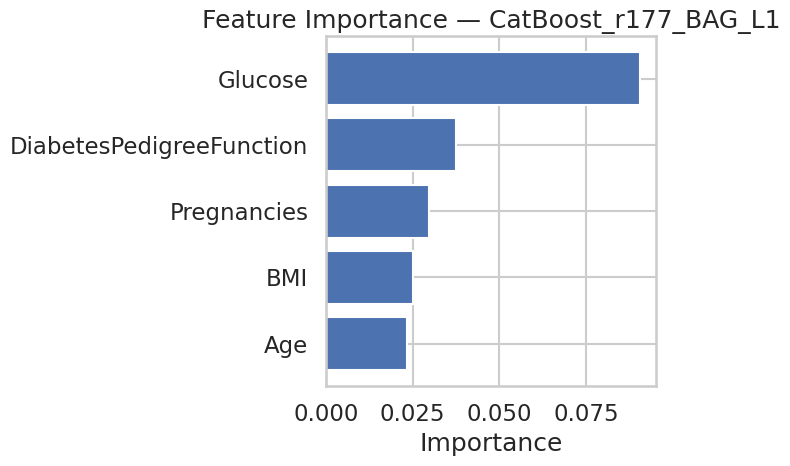

In [51]:
import matplotlib.pyplot as plt

leader = predictor.leaderboard(test_df, silent=True)
best_model_name = leader.sort_values("score_test", ascending=False).iloc[0]["model"]

fi = predictor.feature_importance(test_df, model=best_model_name)

fi_top = fi.sort_values("importance", ascending=True).tail()

plt.figure(figsize=(7, 5))
plt.barh(fi_top.index, fi_top["importance"])
plt.title(f"Feature Importance — {best_model_name}")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


Dentro de las features más importantes, encontramos Glucose, DiabetesPedigree (riesgo por familiares), pregnancies, BMI y edad. En este caso, encontramos que algunas de las variables más correlacionadas son las que más influencian dentro del modelo. Sin embargo, también nos damos cuenta como alguna cómo DiabetesPedigree realmente no estaban muy correlacionadas con la variable de salida pero siguen teniendo un alto impacto en este modelo.

## 4. Evaluación del Modelo

### Tabla de Mejores Modelos

In [52]:
leader = predictor.leaderboard(test_df, silent=True)
display(leader)

y_pred_ag = predictor.predict(test_df)
acc_ag = accuracy_score(y_test, y_pred_ag)
print(f"AutoGluon accuracy: {acc_ag:.4f} | Baseline accuracy: {acc_base:.4f}")


,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,CatBoost_r177_BAG_L1,0.820312,0.801961,accuracy,0.018930,0.015622,20.051996,0.018930,0.015622,20.051996,1,True,12
1,LightGBM_BAG_L1,0.812500,0.803922,accuracy,0.012189,0.009082,30.539981,0.012189,0.009082,30.539981,1,True,2
2,CatBoost_BAG_L1,0.812500,0.803922,accuracy,0.018497,0.010677,24.669837,0.018497,0.010677,24.669837,1,True,5
3,LightGBM_r131_BAG_L1,0.812500,0.788235,accuracy,0.116514,0.018003,33.555852,0.116514,0.018003,33.555852,1,True,14
4,LightGBMXT_BAG_L1,0.804688,0.813725,accuracy,0.021680,0.013427,29.579958,0.021680,0.013427,29.579958,1,True,1
5,WeightedEnsemble_L2,0.804688,0.813725,accuracy,0.024263,0.014187,29.661870,0.002583,0.000760,0.081912,2,True,15
6,ExtraTreesGini_BAG_L1,0.804688,0.762745,accuracy,0.087991,0.135056,0.789203,0.087991,0.135056,0.789203,1,True,6
7,XGBoost_BAG_L1,0.804688,0.786275,accuracy,0.132205,0.038923,18.602304,0.132205,0.038923,18.602304,1,True,9
8,RandomForestEntr_BAG_L1,0.789062,0.766667,accuracy,0.083427,0.180824,0.948282,0.083427,0.180824,0.948282,1,True,4
9,RandomForestGini_BAG_L1,0.789062,0.784314,accuracy,0.087201,0.199769,0.879985,0.087201,0.199769,0.879985,1,True,3


AutoGluon accuracy: 0.8047 | Baseline accuracy: 0.8047


En este leaderboard el mejor desempeño en test lo da CatBoost_r177_BAG_L1 con 0.8203 de accuracy (val≈0.802), seguido muy de cerca por LightGBM_BAG_L1 y CatBoost_BAG_L1 (≈0.8125). La WeightedEnsemble_L2 no supera al mejor individual y queda en 0.8047, similar a LightGBMXT y XGBoost. Los RandomForest/ExtraTrees y las redes (NeuralNetTorch/FastAI) se quedan un poco atrás (≈0.77–0.80), además con tiempos de fit más altos en el caso de las redes. Las brechas entre score_val y score_test son pequeñas en general, lo que sugiere poca sobreajuste; la diferencia real entre los top es mínima (~1 punto), así que elegir CatBoost_r177 como modelo principal es razonable por rendimiento y latencia de inferencia baja, manteniendo como alternativas muy competitivas a LightGBM y al ensamble.

### Matriz de Confusión

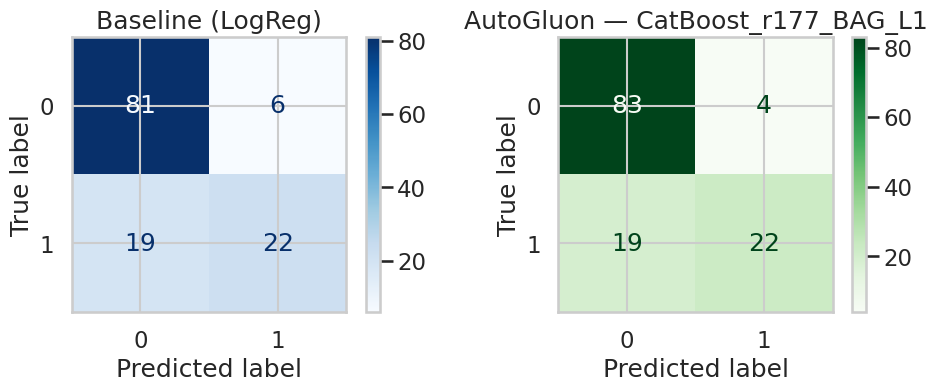

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_base, cmap="Blues", ax=axes[0])
axes[0].set_title("Baseline (LogReg)")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best, cmap="Greens", ax=axes[1])
axes[1].set_title(f"AutoGluon — {best_model_name}")

plt.tight_layout()
plt.show()

En el caso de las matrices, nos podemos dar cuenta que el rendimiento en realidad fue bastante similar. En este caso, podemos decir que AutoGluon nos dió ciertas opciones para poder explorar a futuro. Dónde podemos tomar como referencia algunos de los modelos con mejor rendimiento y a partir de intervención manual intentar mejorarlos. En cuanto a la interpretación de las matrices, ambos modelos "sufren" de la sobrepredicción de la clase principal. Esto se puede deber al entrenamiento basado en "accuracy", dónde el desbalanceo de clases causa estas sobrepredicciones para intentar mejorar esta métrica. A futuro, se puede explorar intentar optimizar los modelos bajo diferentes métricas para evaluar su rendimiento en áreas específicas. En este caso, CatBoost tuvo ligeramente mejores predicciones en cuanto a los casos que no tienen diabetes (2 falsos positivos menos) en comparación a la regresión logística. Sin embargo, con la regresión logística al ser un modelo más simple se pueden interpretar de manera más sencilla los resultados por lo que en ciertos aspectos se puede considerar un "mejor" modelo.

### Métricas Adicionales

In [54]:
from sklearn.metrics import classification_report

print("=== Baseline (LogReg) ===")
print(classification_report(y_test, y_pred_base, digits=4))

print("\n=== AutoGluon (Best) ===")
print(classification_report(y_test, y_pred_best, digits=4))


=== Baseline (LogReg) ===
              precision    recall  f1-score   support

           0     0.8100    0.9310    0.8663        87
           1     0.7857    0.5366    0.6377        41

    accuracy                         0.8047       128
   macro avg     0.7979    0.7338    0.7520       128
weighted avg     0.8022    0.8047    0.7931       128


=== AutoGluon (Best) ===
              precision    recall  f1-score   support

           0     0.8137    0.9540    0.8783        87
           1     0.8462    0.5366    0.6567        41

    accuracy                         0.8203       128
   macro avg     0.8299    0.7453    0.7675       128
weighted avg     0.8241    0.8203    0.8073       128



Observando las métricas adicionales, también se mantienen bastante similares, lo cuál es de esperarse el tener matrices de confusión tan similares. Podemos ver que AutoGluon tiene un mejor Recall para la clase dominante, mientras que ambos tuvieron un rendimiento idéntico en cuanto al recall de las personas con diabetes. El accuracy es bastante similar entre ambos, únicamente variando por 2%.

### ROC y AUC

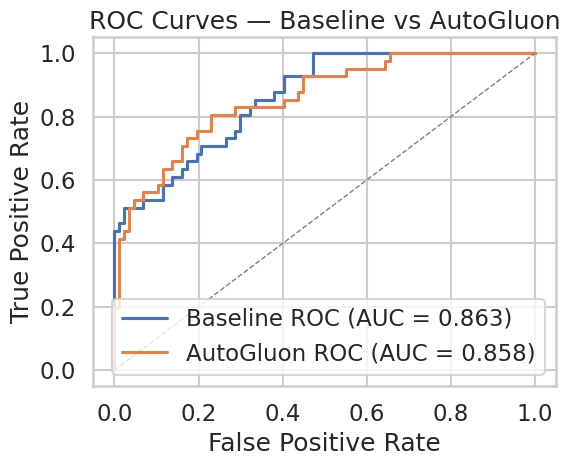

In [55]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

y_score_base = base_clf.predict_proba(X_test)[:, 1]

proba_ag = predictor.predict_proba(test_df, model=best_model_name)
if isinstance(proba_ag, pd.Series):
    y_score_best = proba_ag.values
elif isinstance(proba_ag, pd.DataFrame):
    if 1 in proba_ag.columns:
        y_score_best = proba_ag[1].values
    elif "1" in proba_ag.columns:
        y_score_best = proba_ag["1"].values
    else:
        y_score_best = proba_ag.iloc[:, -1].values
else:
    y_score_best = np.asarray(proba_ag)

fpr_b, tpr_b, _ = roc_curve(y_test, y_score_base, pos_label=1)
fpr_a, tpr_a, _ = roc_curve(y_test, y_score_best, pos_label=1)
auc_b = auc(fpr_b, tpr_b)
auc_a = auc(fpr_a, tpr_a)

plt.figure(figsize=(6, 5))
plt.plot(fpr_b, tpr_b, label=f"Baseline ROC (AUC = {auc_b:.3f})")
plt.plot(fpr_a, tpr_a, label=f"AutoGluon ROC (AUC = {auc_a:.3f})")
plt.plot([0, 1], [0, 1], "--", linewidth=1, color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — Baseline vs AutoGluon")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


En la curva ROC ambos modelos rinden muy parecido: AUC baseline = 0.863 vs AutoGluon = 0.858 (diferencia de 0.005, práctica­mente marginal). Visualmente, el baseline mantiene una ligera ventaja en la zona de FPR baja (cuando queremos pocos falsos positivos), mientras que AutoGluon se acerca e incluso sobrepasa en tramos medios de FPR. En conclusión, los modelos tienen un rendimiento bastante similar y realmente no hay uno "mejor". Depende del caso de uso, dónde si se exige minimizar FPR podría ser ligeramente preferible el baseline. Realmente debería de consultarse con profesionales de la salud, dónde la optimización en este caso tendría que ser para métricas específicas.

## 5. Reflexión

### ¿Qué ventajas y desventajas encontró al usar AutoGluon y AutoML en general?

En general, la principal ventaga de utilizar AutoGluon es ahorrar tiempo a la hora de trabajar con modelos de ML. AutoGluon realiza pruebas con múltiples modelos e hiperparámetros, dándonos una salida bastante fácil de entender y con bastante información. Por ejemplo, fuimos capaces de tener un leaderboard con diferentes modelos dónde se puede fácilmente visualizar su rendimiento e información adicional cómo importancia de features fácilmente. Esto ayuda a evitar bastante trabajo manual de experimentar con diferentes modelos, ajustar hiperparámetros, comparar rendimiento, etc. Sin embargo, el no tener control sobre cada decisión también puede tener un impacto negativo. AutoGluon agrega todavía una capa más de "caja negra", dónde se pierde la "explicabilidad" de los modelos o por qué funcionan. Adicionalmente, AutoGluon no logra reemplazar completamente el criterio humano. Al final del día, si los datos tienen algunas peculiaridades (por ejemplo, si no hubiéramos removido los 0s ilógicos) el sistema puede estar optimizando malas entradas. Por último, también es bastante más intensivo en cuanto a recursos computacionales al compararlo con diferentes modelos.

### ¿Qué métricas considera más relevantes en este problema?

Consideramos que el accuracy realmente solo da una vista rápida, también se debería de priorizar el recall de la clase que presenta diabetes (ya que es realmente lo que buscamos con el modelo, identificar casos de diabetes). Algunas métricas como el F1-score también pueden ser útiles para mantener en cuenta lo que va "más allá del accuracy". Por último, también es importante poder interpretar las matrices de confusión al igual que las gráficas de ROC y el AUC para realizar comparaciones aptas entre modelos.

### ¿Qué precauciones deberían tomarse al aplicar este tipo de herramientas en salud?

Para un uso responsable en salud, debemos primero conocer la procedencia y cobertura del dataset: verificar que incluya pacientes de distintos perfiles (edad, sexo, antecedentes, contexto socioeconómico) y documentar su origen, criterios de inclusión/exclusión y posibles sesgos de selección. En segundo lugar, garantizar reproducibilidad e integridad del proceso. Tercero, auditar sesgos por subgrupos: reportar métricas desagregadas (p. ej., por edad/sexo) y comparar desempeño relativo para identificar disparidades. Cuarto, validar métricas e interpretabilidad: no quedarnos solo con accuracy; revisar recall/precision/F1, ROC-AUC/PR-AUC, matriz de confusión; complementar con importancia de variables. Quinto, intentar preferir modelos más "interpretables" cómo lo pueden ser regresiones o árboles de decisión (para entender realmente que hace cada variable, evitando tener una "caja negra"). Finalmente, enmarcar el modelo como herramienta de apoyo, no como sustituto del juicio clínico.

### ¿Cómo compara esta experiencia con construir un modelo manualmente?
AutoGluon nos da un punto de partida bastante fuerte en poco tiempo, al probar varios algoritmos e hiperparámetros tiene como salida un leaderboard claro. Esto nos ayuda a acotar un poco más el espacio de búsqueda sin invertir tanto tiempo en experimentación manual. Por otro lado, el construir el modelo a mano nos permite entender por qué funciona y tener un mejor "assesment" sobre cómo se están relacionando los datos y por qué funciona. A mano tenemos la libertad de controlar los modelos, elegir los features con un mejor criterio y posiblemente tener algo más ligero y explicable. En la práctica, lo mejor puede ser combinar ambos enfoques. AutoML se debería utilizar para explorar y tener una idea de como puede ser el desempeño de los modelos.